In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import json

fontpath = Path('/Users/zain.ali/Library/Fonts/JetBrainsMonoNL-Regular.ttf')

In [2]:
df = pd.DataFrame({
    'CPU': json.load(open('../data/pcmark/software/result.json')),
    'GPU': json.load(open('../data/pcmark/hardware/result.json')),
}).transpose()

/var/folders/j8/14pm9ybx14j8yz_4jw6sx9l00000gq/T/ipykernel_4129/410959899.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i - 0.2, df.loc['GPU'][i] + 200, round(df.loc['GPU'][i], 2), **kw)
/var/folders/j8/14pm9ybx14j8yz_4jw6sx9l00000gq/T/ipykernel_4129/410959899.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i + 0.2, df.loc['CPU'][i] + 200, round(df.loc['CPU'][i], 2), **kw)
/var/folders/j8/14pm9ybx14j8yz_4jw6sx9l00000gq/T/ipykernel_4129/410959899.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as l

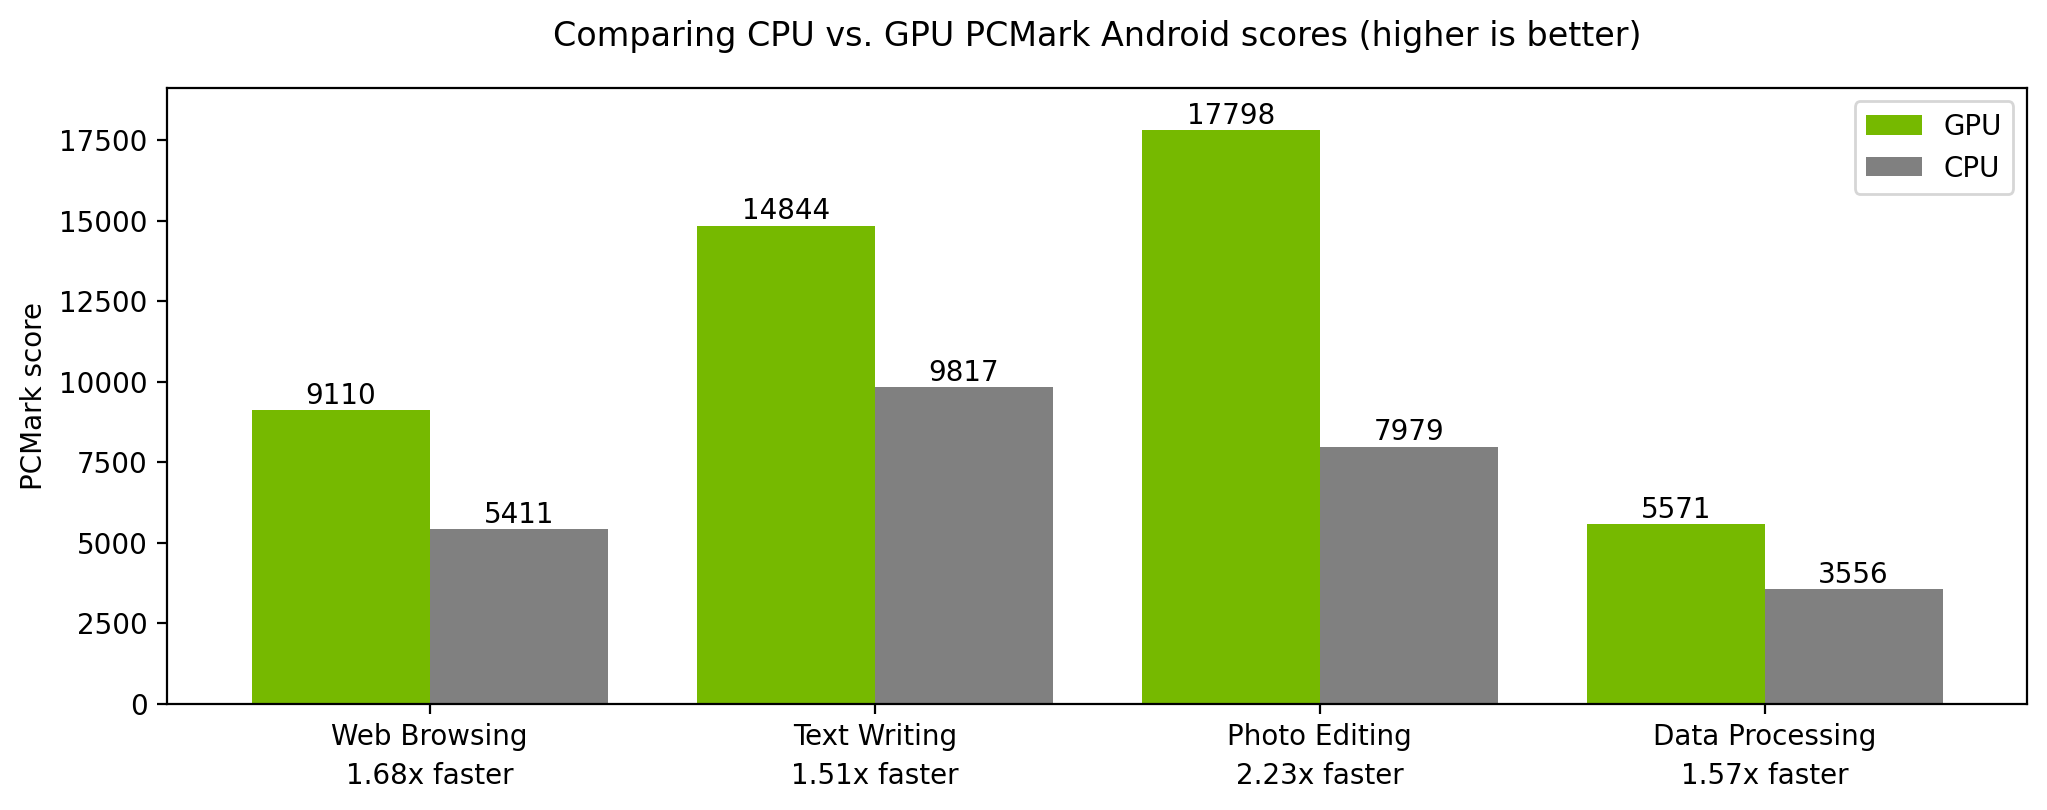

In [3]:
plt.figure(figsize=(12, 4), dpi=200)

cases = np.arange(len(df.columns))

plt.xticks(cases, df.columns)
plt.ylabel("PCMark score")
plt.title("Comparing CPU vs. GPU PCMark Android scores (higher is better)", pad=15)

plt.bar(cases - 0.2, df.loc['GPU'], 0.4, label='GPU', color='#76B900')
plt.bar(cases + 0.2, df.loc['CPU'], 0.4, label='CPU', color='grey')
plt.legend()

for i in cases:
    kw = { 'color': 'black', 'horizontalalignment': 'center' }
    # absolute values
    plt.text(i - 0.2, df.loc['GPU'][i] + 200, round(df.loc['GPU'][i], 2), **kw)
    plt.text(i + 0.2, df.loc['CPU'][i] + 200, round(df.loc['CPU'][i], 2), **kw)

    # speedup
    speedup = df.loc['GPU'][i] / df.loc['CPU'][i]
    plt.text(i, -2500, f'{round(speedup, 2)}x faster', **kw)

plt.margins(0.05, 0.075)
plt.show()
